In [1]:
import os
import sys
import pandas as pd
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import patterns.python.subgraph_centrality as sgc
from os import listdir
from os.path import isfile, join


In [3]:
def get_metrics(image_array):
    
    feature_vec, sel_pixels = sgc.subgraph_centrality(image_array)
    # get the images showing the selected sub-regions
    feature_vec_metrics = sgc.feature_vector_metrics(feature_vec)
    
    return feature_vec_metrics


In [4]:
labels = pd.read_json("labels.json")
labels.head()

,category,image_name,latitude,longitude,notes,time,username
0,Gaps,static/images/1575899144/50d2903286ec8c986dc84...,11.554,27.975,,2016-12-14,nick
1,Labyrinths,static/images/1575899144/eb916e6cbacab53d93144...,11.550,27.925,,2016-11-11,nick
2,Labyrinths,static/images/1575899144/3c5f6248f68915b95fa2b...,11.527,27.970,,2016-06-14,nick
3,Gaps,static/images/1575899144/9b446f5c56d1813176a47...,11.609,27.966,,2016-02-15,nick
4,Labyrinths,static/images/1575899144/eb916e6cbacab53d93144...,11.613,27.966,,2016-11-11,nick


In [9]:
# download all figures
for index in range(0,labels.shape[0]): 
    image = labels.iloc[index]['image_name']
    os.system("wget http://imagelabeller.azurewebsites.net/"+image)



In [5]:
metrics = []
for index in range(0,labels.shape[0]): 
    image = labels.iloc[index]['image_name']
    print (image[25:])
    print (labels.iloc[index]['category'])
    image_array = sgc.read_image_file('images/'+image[25:])
    try:
        m = get_metrics(image_array)
        labels.loc[index,'sc_fv_slope'] = m['slope']
        labels.loc[index,'sc_fv_offset'] = m['offset']
        labels.loc[index,'sc_fv_mean'] = m['mean']
        labels.loc[index,'sc_fv_std'] = m['std']
    except:
        print ('Issue with file',image)
        continue
    
   
    

50d2903286ec8c986dc847f5fe4a6c65_27.975_11.554_2016-12-14.png
Gaps
eb916e6cbacab53d93144e1b5fdc0d39_27.925_11.550_2016-11-11.png
Labyrinths
3c5f6248f68915b95fa2be88dee82c73_27.970_11.527_2016-06-14.png
Labyrinths
9b446f5c56d1813176a47a06658329f0_27.966_11.609_2016-02-15.png
Gaps
eb916e6cbacab53d93144e1b5fdc0d39_27.966_11.613_2016-11-11.png
Labyrinths
2b6a031332a0e88b1958aa74e4f9d16c_27.943_11.581_2016-01-16.png
None
cb391bda3ee0579631e8b329f9c1633e_27.975_11.559_2016-08-13.png
Labyrinths
5ecf8128e82e833e2e047dcdf0410416_27.989_11.577_2016-04-15.png
None
7288c58e56a14ad6d635ab7ee3a4e8a5_27.993_11.581_2016-03-16.png
Labyrinths
eb916e6cbacab53d93144e1b5fdc0d39_27.925_11.554_2016-11-11.png
Gaps
cd4da5ca11659e227bd22325b953ec35_27.984_11.554_2016-07-14.png
Labyrinths
Issue with file static/images/1575899144/cd4da5ca11659e227bd22325b953ec35_27.984_11.554_2016-07-14.png
9b446f5c56d1813176a47a06658329f0_27.989_11.618_2016-02-15.png
None
eb916e6cbacab53d93144e1b5fdc0d39_27.989_11.545_2016-11-11

e78b9322b6b8158c3b8eaa1eb89fa8a8_27.989_11.581_2016-09-12.png
None
053a5c695c6ed4f336e7585c1af46d63_27.989_11.590_2016-10-12.png
None
3c5f6248f68915b95fa2be88dee82c73_27.920_11.527_2016-06-14.png
None
2b6a031332a0e88b1958aa74e4f9d16c_27.902_11.572_2016-01-16.png
Gaps


In [6]:
labels.head()

print (labels[labels['category']=='Gaps'].shape)
print (labels[labels['category']=='None'].shape)
print (labels[labels['category']=='Spots'].shape)
print (labels[labels['category']=='Labyrinths'].shape)

(20, 11)
(47, 11)
(3, 11)
(45, 11)


/anaconda3/envs/patterns/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/anaconda3/envs/patterns/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


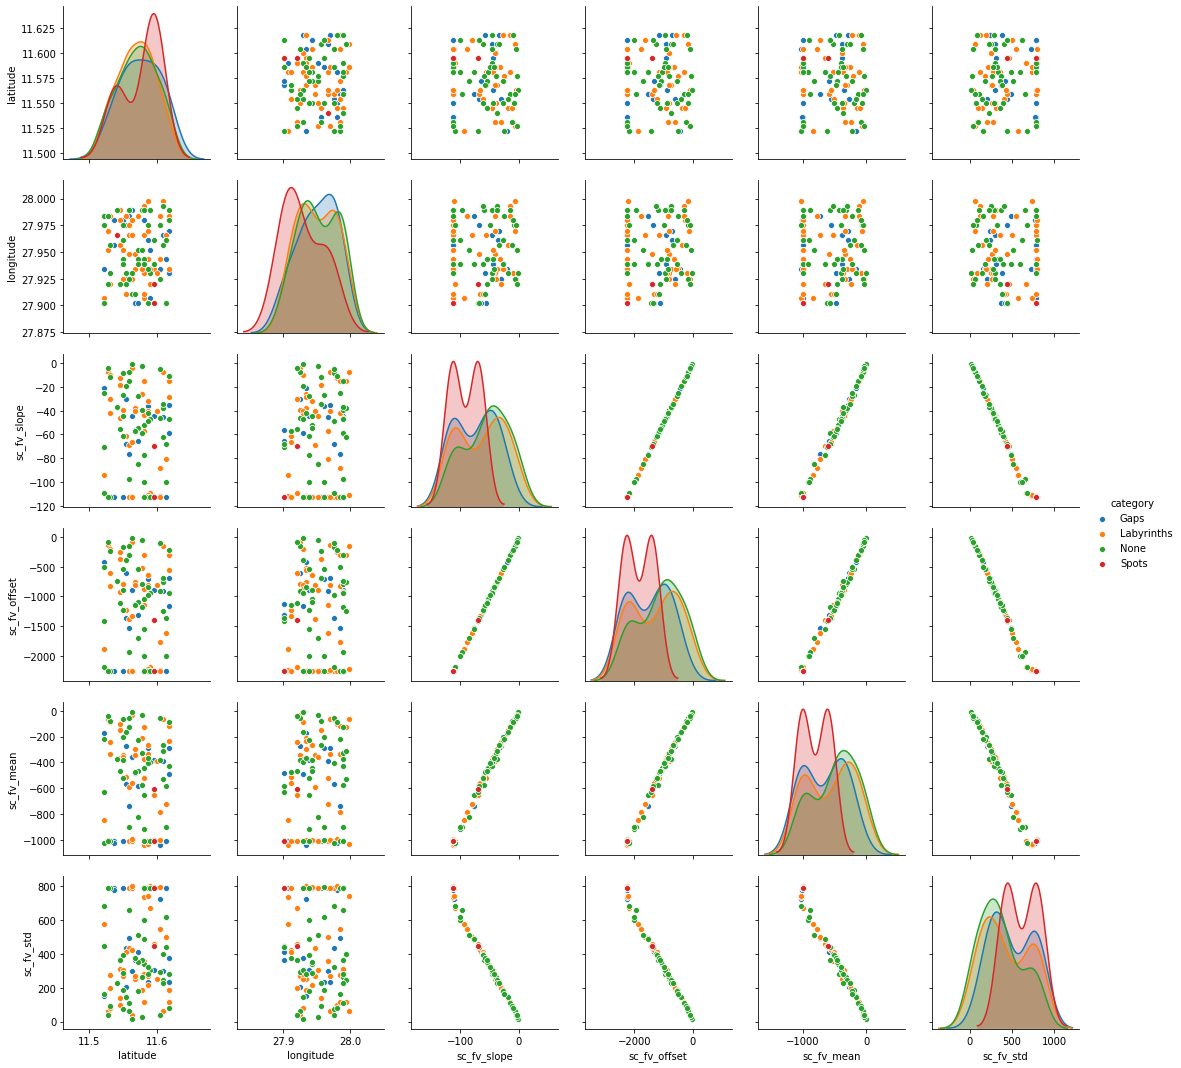

In [7]:
import seaborn as sns
g = sns.pairplot(labels, hue="category")
